In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded= files.upload()

Saving time_series_data_human_activities.csv to time_series_data_human_activities.csv


In [3]:
import io
df= pd.read_csv(io.BytesIO(uploaded['time_series_data_human_activities.csv']))

In [5]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073623 entries, 0 to 1073622
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1073623 non-null  int64  
 1   activity   1073623 non-null  object 
 2   timestamp  1073623 non-null  int64  
 3   x-axis     1073623 non-null  float64
 4   y-axis     1073623 non-null  float64
 5   z-axis     1073623 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 49.1+ MB


In [6]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.03
1,1,Walking,4991972333000,6.85,7.44,-0.50
2,1,Walking,4992022351000,0.93,5.63,-0.50
3,1,Walking,4992072339000,-2.11,5.01,-0.69
4,1,Walking,4992122358000,-4.59,4.29,-1.95


In [7]:
countOfActivity= df['activity'].value_counts()
print(countOfActivity)

Walking       417901
Jogging       324600
Upstairs      122598
Downstairs    100192
Sitting        59939
Standing       48393
Name: activity, dtype: int64


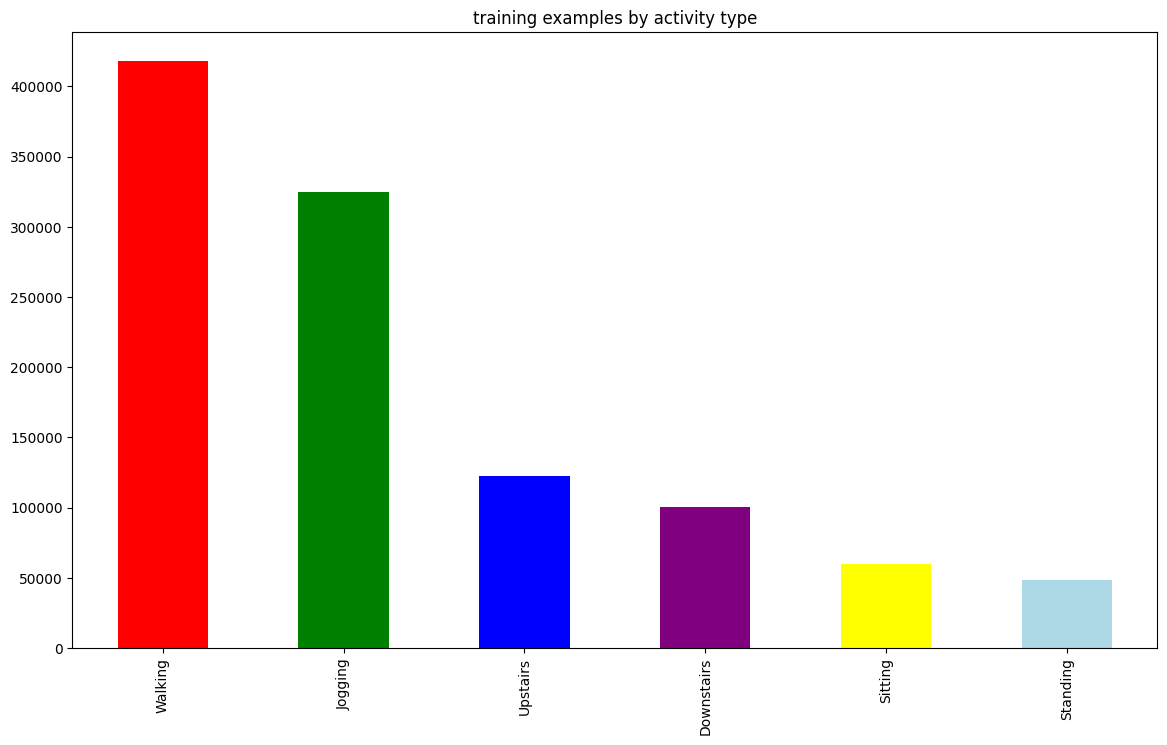

In [8]:
  color = ['red', 'green', 'blue', 'purple', 'yellow', 'lightblue']
  countOfActivity.plot(kind='bar', title='training examples by activity type', figsize=(14,8), color=color);

In [9]:
countOfActivityPerPerson=df['user'].value_counts()
print(countOfActivityPerPerson)
totalActivity=countOfActivityPerPerson.sum()
print("Total number of activity recorded = "+ str(totalActivity))

20    54294
19    45382
31    44282
8     41187
14    38192
29    36768
13    36063
34    35947
3     35158
10    34875
27    33456
32    33357
12    32641
26    32578
36    32108
18    31705
11    31658
7     30967
1     29978
33    29453
6     28703
5     28509
15    26082
24    25736
23    25673
30    25334
21    23703
2     23525
35    22394
22    22308
17    22020
28    21358
16    20469
25    13468
9     12923
4     11369
Name: user, dtype: int64
Total number of activity recorded = 1073623


<Axes: title={'center': 'Training examples by user'}>

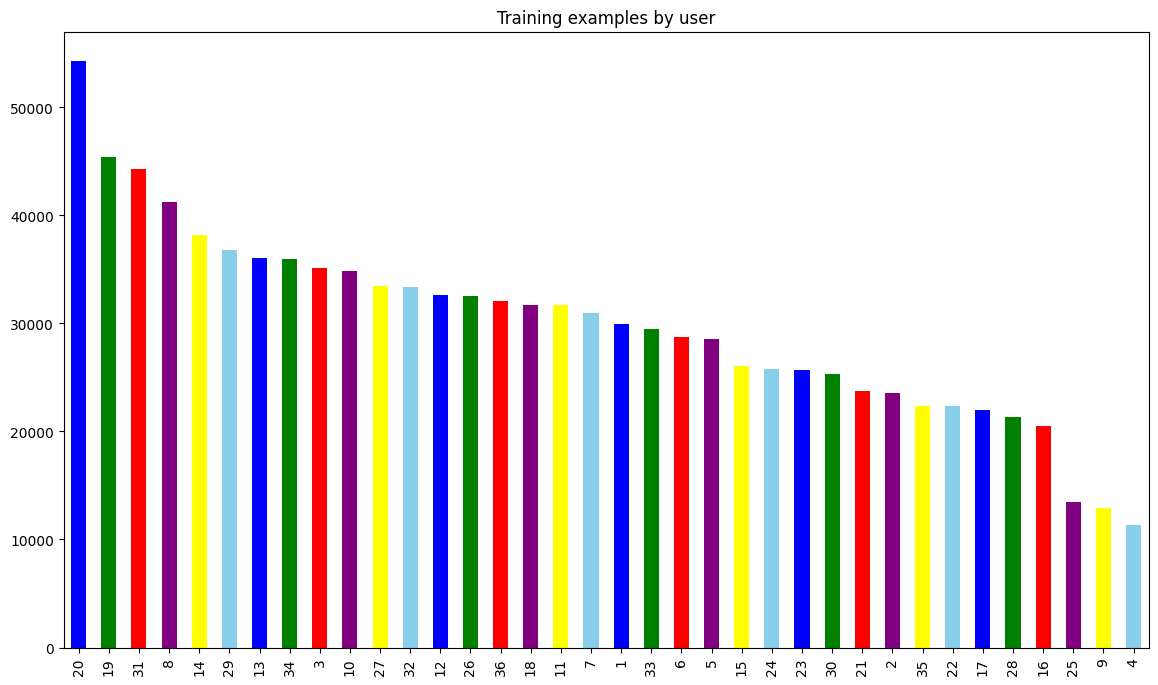

In [10]:
color=['blue', 'green', 'red', 'purple', 'yellow', 'skyblue']
countOfActivityPerPerson.plot(kind='bar', title='Training examples by user', figsize=(14,8), color=color)

In [102]:
# # data preprocessing
# from scipy import stats
# N_TIME_STEPS= 200
# N_FEATURES = 3
# steps = 20
# segments = []
# labels = []
# for i in range(0,len(df)- N_TIME_STEPS,steps):
#   xs= df['x-axis'].values[i: i+ N_TIME_STEPS]
#   ys= df['y-axis'].values[i: i+ N_TIME_STEPS]
#   zs= df['z-axis'].values[i: i+ N_TIME_STEPS]
#   label = stats.mode(df['activity'][i: i+ N_TIME_STEPS])
#   label=label[0][0]
#   segments.append([xs,ys,zs])
#   labels.append(label)

In [103]:
N_TIME_STEPS = 200
N_FEATURES = 3
steps = 20
segments = []
labels = []

for i in range(0, len(df) - N_TIME_STEPS, steps):
    xs = df['x-axis'].values[i: i + N_TIME_STEPS]
    ys = df['y-axis'].values[i: i + N_TIME_STEPS]
    zs = df['z-axis'].values[i: i + N_TIME_STEPS]

    label = df['activity'][i: i + N_TIME_STEPS].mode().values[0]  # Get the mode using pandas mode() function
    label= label[0][0]
    segments.append([xs, ys, zs])
    labels.append(label)


In [104]:
np.array(segments).shape

(53672, 3, 200)

In [105]:
#Transforming shape of segments
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1,N_TIME_STEPS, N_FEATURES)
reshaped_segments.shape

(53672, 200, 3)

In [106]:
# labels = np.asarray(pd.get_dummies(labels), dtype=np.float32)

labels = pd.get_dummies(labels).values.astype(np.float32)




In [32]:
print(labels)
print(labels.shape)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
(53672, 5)


In [107]:
#Splitting the data
import random
RANDOM_SEED=40
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size=0.3, random_state=RANDOM_SEED)

In [108]:
len(X_train)
print('X_train shape:', X_train.shape)
print('training samples:', X_train.shape[0])
print('y_train shape:', y_train.shape)

X_train shape: (37570, 200, 3)
training samples: 37570
y_train shape: (37570, 5)


In [68]:
len(X_test)

16102

In [69]:
N_CLASSES = 6
N_HIDDEN_UNITS = 64

In [99]:
def LSTM_MODEL(inputs):
  W={
      'hidden' : tf.Variable(tf.random.normal([N_FEATURES, N_HIDDEN_UNITS])),
      'output' : tf.Variable(tf.random.normal([N_HIDDEN_UNITS, N_CLASSES]))
  }
  biases = {
      'hidden' : tf.Variable(tf.random.normal([N_HIDDEN_UNITS], mean=1.0)),
      'output' : tf.Variable(tf.random.normal([N_CLASSES]))
  }

  X=tf.transpose(inputs, [1, 0 ,2], name="transpose_6")
  X= tf.reshape(X, [-1, N_FEATURES])
  hidden = tf.nn.relu(tf.matmul(X,W['hidden']) + biases['hidden'])
  hidden= tf.split(hidden, N_TIME_STEPS, 0)

  # stack 2 LSTM layers
  lstm_layers = [tf.keras.layers.LSTM(N_HIDDEN_UNITS, return_sequences=True, unit_forget_bias=1.0) for _ in range(2)]

  model = tf.keras.Sequential(inputs=X, outputs=pred_softmax)
  model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrices=["accuracy"])

  outputs = model(hidden)  #create lstm network out ot lstm layers

  #get o/p for last time step
  lstm_last_output = outputs[-1]

  return tf.matmul(lstm_last_output, W['output'])+ biases['output']

In [100]:
tf.compat.v1.reset_default_graph()

X = tf.keras.Input(shape=[None,N_TIME_STEPS, N_FEATURES], name="input")
Y = tf.keras.Input(shape=[None, N_CLASSES])
pred_Y = LSTM_MODEL(X)
pred_softmax = tf.nn.softmax(pred_Y, name="y_")

ValueError: ignored

ValueError: ignored

In [110]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
df['activityEncode'] = label_encode.fit_transform(df['activity'].values.ravel())
df

,user,activity,timestamp,x-axis,y-axis,z-axis,activityEncode
0,1,Walking,4991922345000,0.69,10.80,-2.030000,5
1,1,Walking,4991972333000,6.85,7.44,-0.500000,5
2,1,Walking,4992022351000,0.93,5.63,-0.500000,5
3,1,Walking,4992072339000,-2.11,5.01,-0.690000,5
4,1,Walking,4992122358000,-4.59,4.29,-1.950000,5
...,...,...,...,...,...,...,...
1073618,36,Standing,15049012250000,-0.91,9.43,2.533385,3
1073619,36,Standing,15049062268000,-1.18,9.51,2.492524,3
1073620,36,Standing,15049112287000,-1.50,9.53,2.533385,3
1073621,36,Standing,15049162275000,-2.07,8.77,2.179256,3


In [136]:
df.isna().sum()

user              0
activity          0
timestamp         0
x-axis            0
y-axis            0
z-axis            0
activityEncode    0
dtype: int64

In [139]:
from scipy.interpolate import interp1d
interpolation_fn = interp1d(df['activityEncode'] ,df['z-axis'], kind='linear')
interpolation_fn

In [140]:
null_list = df[df['z-axis'].isnull()].index.tolist()
null_list

[]

In [142]:
for i in null_list:
    y = df['activityEncode'][i]
    value = interpolation_fn(y)
    df['z-axis']=df['z-axis'].fillna(value)
    print(value)

In [143]:

df.isna().sum()

user              0
activity          0
timestamp         0
x-axis            0
y-axis            0
z-axis            0
activityEncode    0
dtype: int64

In [146]:
df_test = df[df['user'] > 29]
df_train = df[df['user'] <= 29]
df_train['x-axis'] = (df_train['x-axis']-df_train['x-axis'].min())/(df_train['x-axis'].max()-df_train['x-axis'].min())
df_train['y-axis'] = (df_train['y-axis']-df_train['y-axis'].min())/(df_train['y-axis'].max()-df_train['y-axis'].min())
df_train['z-axis'] = (df_train['z-axis']-df_train['z-axis'].min())/(df_train['z-axis'].max()-df_train['z-axis'].min())
df_train

<ipython-input-146-dab35d3941d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['x-axis'] = (df_train['x-axis']-df_train['x-axis'].min())/(df_train['x-axis'].max()-df_train['x-axis'].min())
<ipython-input-146-dab35d3941d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y-axis'] = (df_train['y-axis']-df_train['y-axis'].min())/(df_train['y-axis'].max()-df_train['y-axis'].min())
<ipython-input-146-dab35d3941d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,user,activity,timestamp,x-axis,y-axis,z-axis,activityEncode
0,1,Walking,4991922345000,0.513145,0.766961,0.450901,5
1,1,Walking,4991972333000,0.668857,0.682219,0.489723,5
2,1,Walking,4992022351000,0.519211,0.636570,0.489723,5
3,1,Walking,4992072339000,0.442366,0.620933,0.484902,5
4,1,Walking,4992122358000,0.379676,0.602774,0.452931,5
...,...,...,...,...,...,...,...
850743,29,Downstairs,9481112315000,0.612740,0.724338,0.450915,0
850744,29,Downstairs,9481162517000,0.551820,0.689786,0.589849,0
850745,29,Downstairs,9481212260000,0.528817,0.674149,0.582246,0
850746,29,Downstairs,9481262431000,0.591507,0.701387,0.645146,0


In [147]:
df_train['activityEncode'].value_counts()

5    334434
1    260010
4     98332
0     78662
2     44251
3     35059
Name: activityEncode, dtype: int64

In [150]:
def segments(df, time_steps, step, label_name):
    N_FEATURES = 3
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        xs = df['x-axis'].values[i:i+time_steps]
        ys = df['y-axis'].values[i:i+time_steps]
        zs = df['z-axis'].values[i:i+time_steps]

        label = df['activity'][i: i + time_steps].mode().values[0]
        label= label[0][0]
        segments.append([xs, ys, zs])
        labels.append(label)

    reshaped_segments = np.asarray(segments, dtype=np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels



In [151]:
TIME_PERIOD = 80
STEP_DISTANCE = 40
LABEL = 'activityEncode'
x_train, y_train = segments(df_train, TIME_PERIOD, STEP_DISTANCE, LABEL)

In [152]:
print('x_train shape:', x_train.shape)
print('Training samples:', x_train.shape[0])
print('y_train shape:', y_train.shape)

x_train shape: (21267, 80, 3)
Training samples: 21267
y_train shape: (21267,)


In [153]:
time_period, sensors = x_train.shape[1], x_train.shape[2]
num_classes = label_encode.classes_.size
print(list(label_encode.classes_))

['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']


In [154]:

## reshaping data
input_shape = time_period * sensors
x_train = x_train.reshape(x_train.shape[0], input_shape)
print("Input Shape: ", input_shape)
print("Input Data Shape: ", x_train.shape)

Input Shape:  240
Input Data Shape:  (21267, 240)


In [155]:
x_train = x_train.astype('float32')
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_y_train = encoder.fit_transform(y_train)
y_train = encoded_y_train.astype('float32')

In [156]:
from keras.utils import to_categorical
y_train_hot = to_categorical(y_train, num_classes)
print("y_train shape: ", y_train_hot.shape)

y_train shape:  (21267, 6)


In [168]:
from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from keras.layers import Conv1D, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(input_shape,1), activation='relu'))
model.add(LSTM(32,return_sequences=True, activation='relu'))
model.add(Reshape((1, 240, 32)))
model.add(Conv1D(filters=64,kernel_size=2, activation='relu', strides=2))
model.add(Reshape((120, 64)))
model.add(MaxPool1D(pool_size=4, padding='same'))
model.add(Conv1D(filters=192, kernel_size=2, activation='relu', strides=1))
model.add(Reshape((29, 192)))
model.add(GlobalAveragePooling1D())
model.add(BatchNormalization(epsilon=1e-06))
model.add(Dense(6))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 240, 32)           4352      
                                                                 
 lstm_15 (LSTM)              (None, 240, 32)           8320      
                                                                 
 reshape_19 (Reshape)        (None, 1, 240, 32)        0         
                                                                 
 conv1d_12 (Conv1D)          (None, 1, 120, 64)        4160      
                                                                 
 reshape_20 (Reshape)        (None, 120, 64)           0         
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 30, 64)            0         
 g1D)                                                            
                                                      

In [169]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train,
                    y_train_hot,
                    batch_size= 256,
                    epochs=100
                   )

Epoch 1/100
84/84 [==============================] - 49s 532ms/step - loss: 0.9155 - accuracy: 0.7026
Epoch 2/100
84/84 [==============================] - 45s 532ms/step - loss: 0.5828 - accuracy: 0.7965
Epoch 3/100
84/84 [==============================] - 43s 515ms/step - loss: 0.5374 - accuracy: 0.8017
Epoch 4/100
84/84 [==============================] - 44s 530ms/step - loss: 0.4844 - accuracy: 0.8157
Epoch 5/100
84/84 [==============================] - 43s 517ms/step - loss: 0.4462 - accuracy: 0.8287
Epoch 6/100
84/84 [==============================] - 45s 538ms/step - loss: 0.4157 - accuracy: 0.8406
Epoch 7/100
84/84 [==============================] - 44s 516ms/step - loss: 0.3983 - accuracy: 0.8496
Epoch 8/100
84/84 [==============================] - 44s 519ms/step - loss: 0.3881 - accuracy: 0.8542
Epoch 9/100
84/84 [==============================] - 45s 535ms/step - loss: 0.3688 - accuracy: 0.8657
Epoch 10/100
84/84 [==============================] - 44s 526ms/step - loss: 0.363

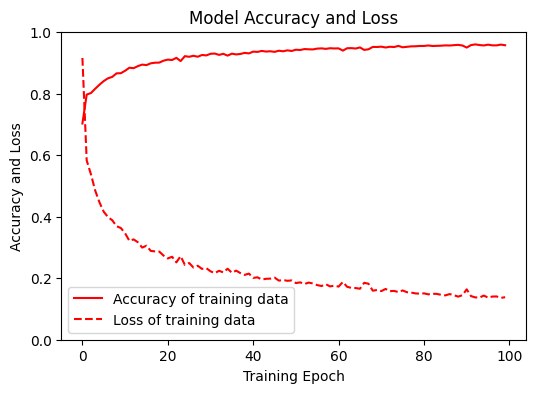

665/665 [==============================] - 39s 56ms/step
              precision    recall  f1-score   support

         0.0       0.83      0.71      0.76      1967
         1.0       0.93      0.99      0.96      6505
         2.0       0.99      0.97      0.98      1983
         3.0       0.92      0.64      0.76      2461
         4.0       0.92      0.99      0.96      8351

    accuracy                           0.92     21267
   macro avg       0.92      0.86      0.88     21267
weighted avg       0.92      0.92      0.92     21267



In [170]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

y_pred_train = model.predict(x_train)
max_y_pred_train = np.argmax(y_pred_train, axis=1)
print(classification_report(y_train, max_y_pred_train))

In [171]:
df_test['x-axis'] = (df_test['x-axis']-df_test['x-axis'].min())/(df_test['x-axis'].max()-df_test['x-axis'].min())
df_test['y-axis'] = (df_test['y-axis']-df_test['y-axis'].min())/(df_test['y-axis'].max()-df_test['y-axis'].min())
df_test['z-axis'] = (df_test['z-axis']-df_test['z-axis'].min())/(df_test['z-axis'].max()-df_test['z-axis'].min())
df_test

<ipython-input-171-49ae88ddd6b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['x-axis'] = (df_test['x-axis']-df_test['x-axis'].min())/(df_test['x-axis'].max()-df_test['x-axis'].min())
<ipython-input-171-49ae88ddd6b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['y-axis'] = (df_test['y-axis']-df_test['y-axis'].min())/(df_test['y-axis'].max()-df_test['y-axis'].min())
<ipython-input-171-49ae88ddd6b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,user,activity,timestamp,x-axis,y-axis,z-axis,activityEncode
850748,30,Walking,152192332000,0.822042,0.599441,0.649317,5
850749,30,Walking,152242320000,0.639029,0.669291,0.558885,5
850750,30,Walking,152292338000,0.744692,0.845314,0.324921,5
850751,30,Walking,152342326000,0.467391,0.785116,0.239485,5
850752,30,Walking,152392345000,0.486097,0.499111,0.500526,5
...,...,...,...,...,...,...,...
1073618,36,Standing,15049012250000,0.472700,0.737617,0.582108,3
1073619,36,Standing,15049062268000,0.465875,0.739649,0.581034,3
1073620,36,Standing,15049112287000,0.457786,0.740157,0.582108,3
1073621,36,Standing,15049162275000,0.443377,0.720853,0.572799,3


In [172]:
x_test, y_test = segments(df_test,
                         TIME_PERIOD,
                         STEP_DISTANCE,
                         LABEL)

x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
encoder = LabelEncoder()
encoded_y_test = encoder.fit_transform(y_test)
y_test = encoded_y_test.astype('float32')
y_test = to_categorical(y_test, num_classes)

In [173]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
score = model.evaluate(x_test, y_test)
print("Accuracy:", score[1])
print("Loss:", score[0])

175/175 [==============================] - 16s 87ms/step - loss: 0.4970 - accuracy: 0.8675
Accuracy: 0.8675044775009155
Loss: 0.4970441460609436


175/175 [==============================] - 10s 56ms/step


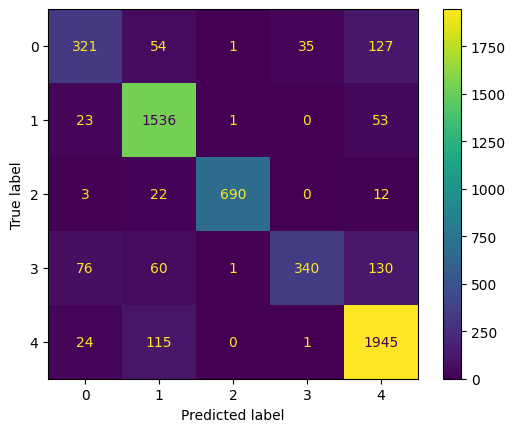

In [174]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
y_test_pred = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_pred, predictions)
cm_disp = ConfusionMatrixDisplay(confusion_matrix= cm)
cm_disp.plot()
plt.show()

In [175]:
print(classification_report(y_test_pred, predictions))

              precision    recall  f1-score   support

           0       0.72      0.60      0.65       538
           1       0.86      0.95      0.90      1613
           2       1.00      0.95      0.97       727
           3       0.90      0.56      0.69       607
           4       0.86      0.93      0.89      2085

    accuracy                           0.87      5570
   macro avg       0.87      0.80      0.82      5570
weighted avg       0.87      0.87      0.86      5570

